<img src="../images/Callysto_Notebook-Banner_Top_06.06.18.jpg"/>

# Pre-requisites / Background

We are expecting that the students understand Celsius to Kelvin conversions, converting between pressure units, Kinetic Molecular Theory (ideal gas assumptions).

In this section we will cover Boyle’s Law, Gay-Lussac’s Law, and Charles’ Law before putting them together in the Combined Gas Law. 

Alberta Curriculum Objective: illustrate how Boyle's and Charles's laws, individually and combined, are related to the ideal gas law (PV = nRT ).

# Introduction
What do your lungs, guns, and airbags all have in common? They all use the gas laws to function. 

The gas laws resulted from 17th century studies into the physical properties of gases - pressure, volume, and temperature.

# The Gas Laws
## Boyle's Law
Picture this: your lungs expand, so the gas particles inside it are much less compared to the space they occupy, whereas outside your lungs, the gas particles are much more dense. We know that particles move from an area of high density to an area of low density, so air rushes into your lungs, enabling you to breathe.

In technical terms, the space the gas occupies is considered its volume, and the density of particles refers to its pressure. This relationship between the two is called Boyle’s Law, the idea that pressure and volume are inversely proportional at a constant temperature. It can be expressed by the equation below: ![P1V1=P2V2](Images/boyles.png).

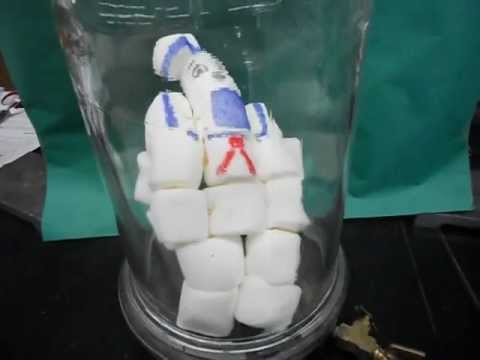

In [1]:
from IPython.lib.display import YouTubeVideo
display(YouTubeVideo('27yqJ9vJ5kQ'))

# Experiment
Let's say we want to find the pressure in an adult male test subject's lungs when they are expanded to maximum capacity. The average lung capacity of an adult human male is 6L. We will test random lung capacities for N trials, and see how Boyle's Law shapes the relationship between pressure and volume.

In [14]:
# Change the variables in this cell to create your own experiment!

# Max volume in liters.
volume = 6

# Number of trials.
N = 100

In [24]:
# Imports.
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import numpy as np

# Initialize plotly for Jupyter notebooks.
init_notebook_mode(connected=True)

# Initialize data sets.
gx = []
gy = []

# Constant multiple in Boyle's Law.
k = 1

# Boyle's Law is technically PV = k, where k is constant for that specific system, (It varies between systems.)
# and P1V1 = P2V2 is only a result of this relationship. Students do not learn this however.
# For simplicity k is set to 1.

# Standard deviation. Arbitrary value.
sd = 0.15

# Randomly generate data based on user defined volume and number of trials.
for i in range(0, N):
    temp = np.random.random_sample() * volume
    
    # Prevent large outliers. The limit is arbitrary, it is just so the graph looks nice.
    limit = np.random.random_sample() + 1
    while(k/temp > volume/limit):
        temp = np.random.random_sample() * volume
    
    outputx = np.random.uniform(temp-sd, temp+sd)
    outputy = np.random.uniform((k/temp)-sd, (k/temp)+sd)
    
    gx.append(outputx)
    gy.append(outputy)
    

# Create a trace.
trace = go.Scatter(
    x = gx,
    y = gy,
    mode = 'markers'
)

# Label the graph.
templayout = go.Layout(
    title = 'Pressure vs. Volume',
    xaxis = dict(title='Volume'),
    yaxis = dict(title='Pressure')
)

# Plot graph
tempdata = [trace]
fig = go.Figure(data = tempdata, layout = templayout)
py.iplot(fig, filename='basic-scatter')

# Charles' Law
In airbags, the temperature is originally extremely high due to the nitrogen gas inflates it. As a result, the volume of the airbag is quickly expanded due to the directly proportional relationship between the temperature and the volume of the gas. When the airbag is later exposed to the outside air, the temperature decreases significantly which causes the volume of the airbag to decrease to a smaller size, creating a softer cushion for the impact.

This relationship between the two variables of volume and temperature is a direct relationship which is defined by the Charle's Law, the idea that the temperature and the volume have an direcly proportional relationship at a constant pressure. It can be expressed by the equation below: ![P1/T1=P2/T2](Images/charles-law.png)



# Gay-Lussac's Law
In bullet guns, you will see a plume of smoke as the gunpowder burns and the bullet whizzes out. The increase in temperature will cause an increase in the pressure which forces the bullet out of the barrel. 

In technical terms, the average kinetic energy of the molecule is referred as the temperature, and the density of the particles is referred as the pressure. The relationship between the two variables is a direct relationship which is defined by the Gay-Lussac's Law, the idea that the temperature and the pressure have an directly proportional relationship at a constant volume. It can be expressed by the euqation below: ![P1/T1=P2/T2](Images/Gay-Lussacs-Law.png)
